In [33]:
import numpy as np
import pylab as pl
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
sns.set()
%matplotlib inline

# 2-Data visualization and pre processing

In [34]:
# Load the data
data = np.load("ECoG.npz") # We load the data as "data"

In [35]:
# We split the data into three parts as mensionned in the description 
xall = data["Xall"]
yall = data["Yall"]
fe = data["Fe"]
print("Xall size is:", xall.shape)
print("Yall size is:", yall.shape)
print("Fe size is:", fe.shape)

Xall size is: (3327, 64)
Yall size is: (3327, 1)
Fe size is: (1, 1)


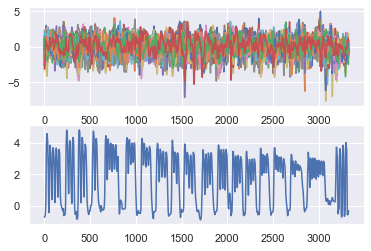

In [36]:
fig, axs = plt.subplots(2)
axs[0].plot(xall)
axs[1].plot(yall)
plt.show()

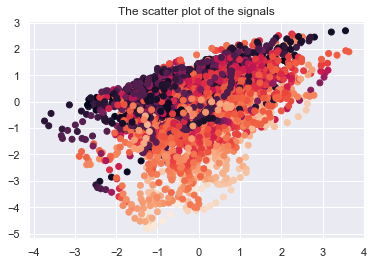

In [37]:
# Scatter plot of the data with 48th and 45th variables 
plt.scatter(xall[:,45],xall[:,48],c = yall)
plt.title("The scatter plot of the signals")
plt.show()

In [38]:
# Split the data into training and testing datasets 

x_train = xall[:1000,:]
y_train = yall[:1000,:]
x_test = xall[1000:,:]
y_test = yall[1000:,:]
print("The shape of the training dataset is: ",x_train.shape)
print("The shape of the test dataset is: ",x_test.shape)

The shape of the training dataset is:  (1000, 64)
The shape of the test dataset is:  (2327, 64)


# 3- Least Squares regression (LS)

In [39]:
x_matrix = np.concatenate((x_train,np.ones((1000,1))), axis = 1)
print("The matrix dimension after concatenation : ",x_matrix.shape)

The matrix dimension after concatenation :  (1000, 65)


In [40]:
# The estimate of the LS 
inv = np.linalg.inv(np.dot(x_matrix.T,x_matrix))
without_y = np.dot(inv,x_matrix.T)
estimator = np.dot(without_y,y_train)
print("The estimator dimension is :", estimator.shape)
w = estimator[:-1,:] # The parameters of the variables
b = estimator[-1,:] # The bias parameter

The estimator dimension is : (65, 1)


In [41]:
# Predicition of the y on the training and test dataset 

y_hat_train = np.dot(x_train,w) + b  
y_hat_test = np.dot(x_test,w) + b

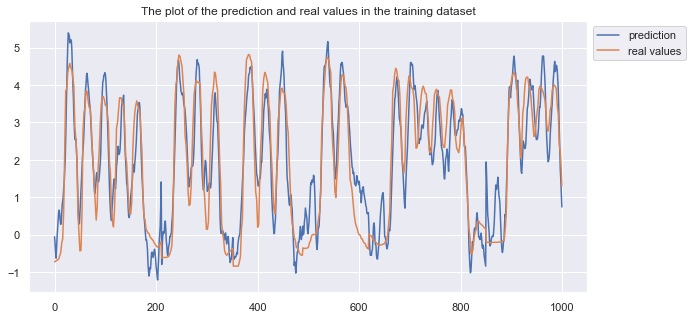

In [42]:
# Plot of the prediction s and the real ones 
plt.figure(figsize = (10,5))
plt.plot(y_hat_train)
plt.plot(y_train)
plt.legend(["prediction","real values"],bbox_to_anchor=(1, 1))
plt.title("The plot of the prediction and real values in the training dataset")
plt.show()

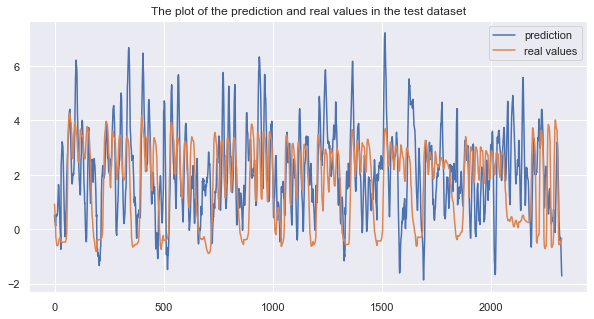

In [43]:
# Plot of the prediction s and the real ones 
plt.figure(figsize = (10,5))
plt.plot(y_hat_test)
plt.plot(y_test)
plt.legend(["prediction","real values"],bbox_to_anchor=(1, 1))
plt.title("The plot of the prediction and real values in the test dataset")
plt.show()

The predicition on the training dataset is very good, but the prediction on the test dataset is very bad. So the model is not performing well on data that he didn't see. We say that the model overfit the data.

In [44]:
# Evaluate the performance by MSE and R^2

MSE_train = mean_squared_error(y_train,y_hat_train) # The MSE on the training dataset
MSE_test = mean_squared_error(y_test,y_hat_test) # The MSE on the training dataset

r2_train = r2_score(y_train,y_hat_train) # The r2_score on the training dataset
r2_test = r2_score(y_test,y_hat_test) # The r2_score on the training dataset
print("The MSE of train and test datasets respectively are : ", (MSE_train,MSE_test))
print("The r2_score of train and test datasets respectively are : ", (r2_train,r2_test))

The MSE of train and test datasets respectively are :  (0.5040654614476062, 3.0455368767601687)
The r2_score of train and test datasets respectively are :  (0.8395001217500111, -0.42817006302225535)


The MSE are too different, the MSE of the training dataset is very small but the MSE of the test dataset is too large. So as expected the r2_score is good on the training but it is really too bad (negative one) on the test dataset. The model overfitted the dataset.  

In [45]:
# Creating the model, and fit it on the training dataset
model = LinearRegression().fit(x_train, y_train)

In [46]:
# Comparaison between the coefficients
print("The average difference between the coefficients : ",(np.mean(model.coef_-w),np.mean(model.intercept_-b)))

The average difference between the coefficients :  (-1.3444106938820255e-16, 1.3322676295501878e-15)


 The average difference between the coefficients are too small so it is the same model, and it will give the same results.

# 4- Ridge regression

In [47]:
# Ridge Model
ridge = Ridge(alpha = 1).fit(x_train, y_train)

pred_train = ridge.predict(x_train)
MSE_ridge_train = mean_squared_error(y_train,pred_train)
r2_ridge_train =  r2_score(y_train,pred_train)

pred_test = ridge.predict(x_test)
MSE_ridge_test = mean_squared_error(y_test,pred_test)
r2_ridge_test =  r2_score(y_test,pred_test)

print("The MSE and r2_score on the training dataset are respectively:",(MSE_ridge_train,r2_ridge_train))
print("The MSE and r2_score on the test dataset are respectively:",(MSE_ridge_test,r2_ridge_test))

The MSE and r2_score on the training dataset are respectively: (0.5041768297327897, 0.8394646608871272)
The MSE and r2_score on the test dataset are respectively: (3.003842959535565, -0.4086181722391591)


The performance is a bit enhanced but we cann't consider this as an enhancement. So we can say that the model gives the same results as the previous model.

In [48]:
# Training a 100 ridge models for different values of lambda 
alpha = np.logspace(-3.0, 5.0, num=100)
params = []
MSE_train_list = []
MSE_test_list = []
for lamb in alpha:
    ridge = Ridge(alpha = lamb).fit(x_train, y_train)
    pred_train = ridge.predict(x_train)
    MSE_ridge_train = mean_squared_error(y_train,pred_train)

    pred_test = ridge.predict(x_test)
    MSE_ridge_test = mean_squared_error(y_test,pred_test)

    MSE_train_list.append(MSE_ridge_train)
    MSE_test_list.append(MSE_ridge_test)
    params.append(ridge.coef_)


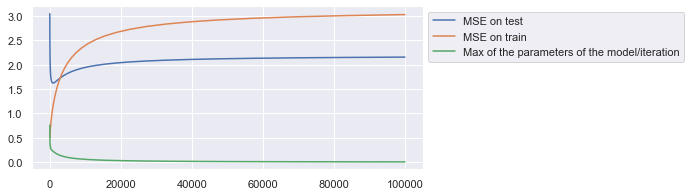

In [49]:
# The eevolution of the MSE on the training and test daataset
params_max = np.array([np.max(para,axis = 1) for para in params])
plt.figure(figsize = (7,3))
plt.plot(alpha,MSE_test_list)
plt.plot(alpha,MSE_train_list)
plt.plot(alpha,params_max)
plt.legend(["MSE on test","MSE on train","Max of the parameters of the model/iteration"],bbox_to_anchor=(1, 1))
plt.show()

The coefficients of the model are going to be zeros when lambda became bigger and bigger, which helps to avoid overfitting. Besides, The MSE for the training is becoming bigger that test with more data. So the model is underfitting the data.

In [50]:
lamb_index = np.argmin(np.array(MSE_test_list))
print("The best model for the test data is for lambda : ",alpha[lamb_index])

The best model for the test data is for lambda :  954.5484566618347


In [51]:
# Best Ridge Model

ridge = Ridge(alpha = alpha[lamb_index]).fit(x_train, y_train)

pred_train = ridge.predict(x_train)
MSE_ridge_train = mean_squared_error(y_train,pred_train)
r2_ridge_train =  r2_score(y_train,pred_train)

pred_test = ridge.predict(x_test)
MSE_ridge_test = mean_squared_error(y_test,pred_test)
r2_ridge_test =  r2_score(y_test,pred_test)

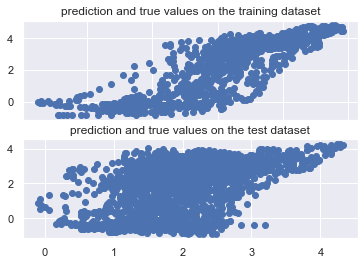

In [52]:
# Visualize the plot of the predictions and the real values 
fig, ax = plt.subplots(2)
ax[0].scatter(pred_train,y_train)
ax[0].set_title("prediction and true values on the training dataset")
ax[1].set_title("prediction and true values on the test dataset")
ax[1].scatter(pred_test,y_test)
ax[0].set_xticklabels([])
plt.show()

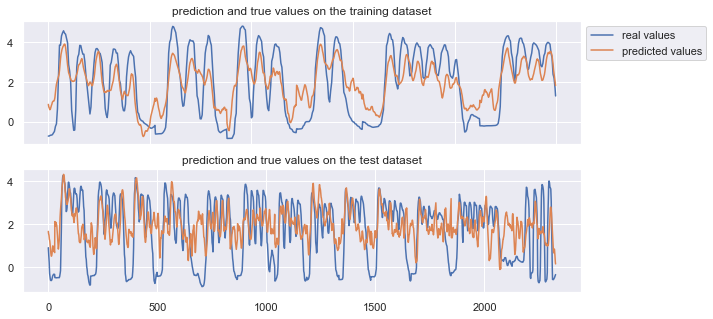

In [53]:
fig, (ax1,ax2) = plt.subplots(2,figsize=(10,5))
ax1.plot(y_train)
ax1.plot(pred_train)
ax1.set_title("prediction and true values on the training dataset")
ax2.set_title("prediction and true values on the test dataset")
ax1.legend(["real values","predicted values"],bbox_to_anchor=(1, 1))
#ax2.legend(["real values","predicted values"],bbox_to_anchor=(1, 1))
ax2.plot(y_test)
ax2.plot(pred_test)
ax1.set_xticklabels([])
plt.show()

This time the model is not as good as the previouse model on the training dataset, but this this time the model is trying to find an equilibrium between both dataset : avoid overfitting and underfitting. As conclusion, the model is better on teh test dataset the the previouse ones, but it still not giving a good predicitons.

In [54]:
# Performnce as MSE and r2_score

MSE_best_ridge_train = mean_squared_error(y_train,pred_train)
r2_best_ridge_train =  r2_score(y_train,pred_train)

MSE_best_ridge_test = mean_squared_error(y_test,pred_test)
r2_best_ridge_test =  r2_score(y_test,pred_test)

In [55]:
print("The MSE for ridge and LS on the train and the test datasets :",((MSE_best_ridge_train,MSE_train),(MSE_best_ridge_test,MSE_test)))
print("The r2_score for ridge and LS on the train and the test datasets :",((r2_best_ridge_train,r2_train),(r2_best_ridge_test,r2_test)))      

The MSE for ridge and LS on the train and the test datasets : ((1.171943038200963, 0.5040654614476062), (1.6239059826952074, 3.0455368767601687))
The r2_score for ridge and LS on the train and the test datasets : ((0.6268406996047915, 0.8395001217500111), (0.23848766129037868, -0.42817006302225535))


 The goal of ridge is to prevent overfitting, so the MSE on the training dataset would be bigger and the MSE of the test dataset would decrease. So if we focus on the test dataset, we see that r2_score is a lot better than LS model. So the generalization error is decreased for now, and ridge have done the work. But we still should find a better model to diminish the estimation error.

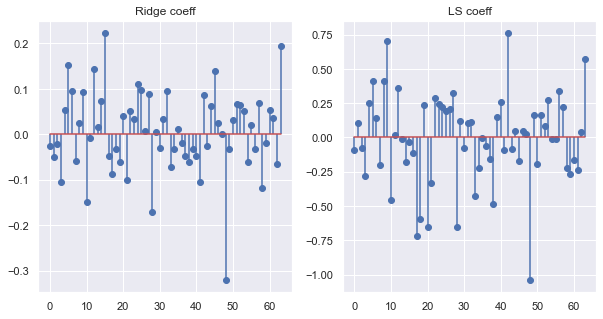

In [56]:
# The coeff plot
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (10,5))
ax1.stem(ridge.coef_[0,:])
ax1.set_title("Ridge coeff")
ax2.set_title("LS coeff")
ax2.stem(model.coef_[0,:])
plt.show()

The coefficients of ridge and LS seems to be proportionnal but they don't have the same scale. The coefficients of the ridge are very small than the coefficients if the LS, which is the goal of ridge models. 

# 5- Variable selection with the Lasso

In [57]:
# Lasso model with the default parameters, on the training dataset
lasso = Lasso().fit(x_train,y_train)

In [58]:
# The prediction and the performance of the model

pred_lasso_train = lasso.predict(x_train)
MSE_lasso_train = mean_squared_error(y_train,pred_lasso_train)
r2_lasso_train =  r2_score(y_train,pred_lasso_train)

pred_lasso_test = lasso.predict(x_test)
MSE_lasso_test = mean_squared_error(y_test,pred_lasso_test)
r2_lasso_test =  r2_score(y_test,pred_lasso_test)

print("The MSE and r2_score on the training dataset are respectively:",(MSE_lasso_train,r2_lasso_train))
print("The MSE and r2_score on the test dataset are respectively:",(MSE_lasso_test,r2_lasso_test))

The MSE and r2_score on the training dataset are respectively: (3.1405971577280063, 0.0)
The MSE and r2_score on the test dataset are respectively: (2.190675841640482, -0.02729265197579034)


In [59]:
# The coeff of the lasso model
print("The lasso coefficients are :",(lasso.coef_,lasso.intercept_))

The lasso coefficients are : (array([ 0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0., -0.,  0.,  0.,
       -0.,  0.,  0., -0., -0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0.,
        0.,  0., -0.,  0., -0.,  0.,  0., -0., -0., -0., -0.,  0.,  0.,
        0.,  0., -0.,  0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0.]), array([1.9443274]))


All the coefficients of the model are 0 except the intercept. So lasso model predicts the same values for all x. In other words, lasso in this case is constant function.

In [60]:
# Training a 100 lasso models for different values of lambda 
alpha = np.logspace(-3.0, 5.0, num=100)
params_lasso = []
MSE_train_lasso_list = []
MSE_test_lasso_list = []
for lamb in alpha:
    lasso = Lasso(alpha = lamb).fit(x_train, y_train)
    pred_lasso_train = lasso.predict(x_train)
    MSE_lasso_train = mean_squared_error(y_train,pred_lasso_train)
    r2_lasso_train =  r2_score(y_train,pred_lasso_train)

    pred_lasso_test = lasso.predict(x_test)
    MSE_lasso_test = mean_squared_error(y_test,pred_lasso_test)
    r2_lasso_test =  r2_score(y_test,pred_lasso_test)

    MSE_train_lasso_list.append(MSE_lasso_train)
    MSE_test_lasso_list.append(MSE_lasso_test)
    params_lasso.append(lasso.coef_)
    

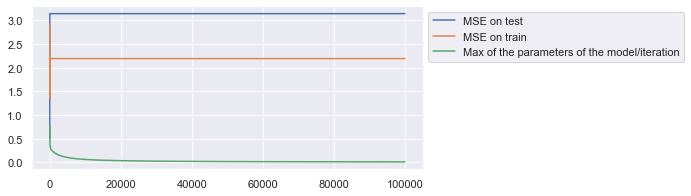

In [61]:
# The evolution of the MSE on the training and test dataset
params_lasso_max = np.array([np.max(para,axis = 1) for para in params])
plt.figure(figsize = (7,3))
plt.plot(alpha,MSE_train_lasso_list)
plt.plot(alpha,MSE_test_lasso_list)
plt.plot(alpha,params_lasso_max)
plt.legend(["MSE on test","MSE on train","Max of the parameters of the model/iteration"],bbox_to_anchor=(1, 1))
plt.show()

In [62]:
lamb_index = np.argmin(np.array(MSE_test_lasso_list))
print("The best model for the test data is for lambda : ",alpha[lamb_index])

The best model for the test data is for lambda :  0.1261856883066021


In [63]:
# Best Lasso Model

lasso =Lasso(alpha = alpha[lamb_index]).fit(x_train, y_train)

pred_best_lasso_train = lasso.predict(x_train)
MSE_best_lasso_train = mean_squared_error(y_train,pred_lasso_train)
r2_best_lasso_train =  r2_score(y_train,pred_lasso_train)

pred_best_lasso_test = lasso.predict(x_test)
MSE_best_lasso_test = mean_squared_error(y_test,pred_lasso_test)
r2_best_lasso_test =  r2_score(y_test,pred_lasso_test)

print("The MSE and r2_score on the training dataset are respectively:",(MSE_best_lasso_train,r2_best_lasso_train))
print("The MSE and r2_score on the test dataset are respectively:",(MSE_best_lasso_test,r2_best_lasso_test))

The MSE and r2_score on the training dataset are respectively: (3.1405971577280063, 0.0)
The MSE and r2_score on the test dataset are respectively: (2.190675841640482, -0.02729265197579034)


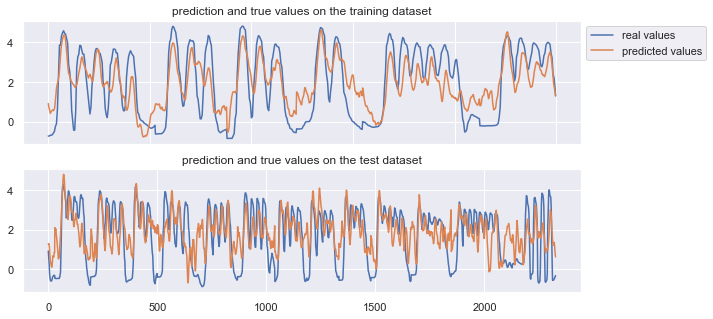

In [64]:
fig, (ax1,ax2) = plt.subplots(2,figsize=(10,5))
ax1.plot(y_train)
ax1.plot(pred_best_lasso_train)
ax1.set_title("prediction and true values on the training dataset")
ax2.set_title("prediction and true values on the test dataset")
ax1.legend(["real values","predicted values"],bbox_to_anchor=(1, 1))
#ax2.legend(["real values","predicted values"],bbox_to_anchor=(1, 1))
ax2.plot(y_test)
ax2.plot(pred_best_lasso_test)
ax1.set_xticklabels([])
plt.show()

In [68]:
lasso.coef_

array([-0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.07757858,  0.        , -0.        ,  0.        ,  0.        ,
       -0.1146682 ,  0.        ,  0.09047535,  0.        ,  0.        ,
        0.37611771, -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.09769496,  0.        ,  0.        ,  0.10678253,
        0.08349543, -0.        ,  0.        , -0.09337529, -0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.06143585, -0.        ,
       -0.        , -0.14587363,  0.14635455, -0.        ,  0.        ,
        0.27897347,  0.        ,  0.        , -0.70862161, -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.31889792])

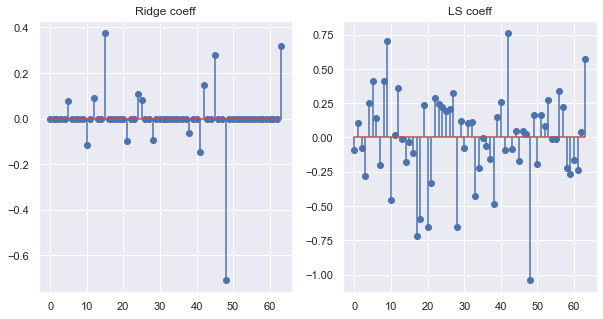

The most imporant variable is the variable of index: 48


In [72]:
# The coeff plot
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (10,5))
ax1.stem(lasso.coef_)
ax1.set_title("Ridge coeff")
ax2.set_title("LS coeff")
ax2.stem(model.coef_[0,:])
plt.show()
print("The most imporant variable is the variable of index:",np.argmin(lasso.coef_))

The lasso is trying to make some values of the parameters 0, trying to give more importance to a significant variables by making the others nul.